<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

np.set_printoptions(precision = 6, suppress = True, edgeitems = 10, linewidth = 100000,
                    formatter = dict(float = lambda x: f'{x:.2f}'))
np.random.seed(42)
sklearn.__version__

'0.22.2.post1'

In [3]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.arange(-4, 4, 0.01)
y = sigmoid(x)

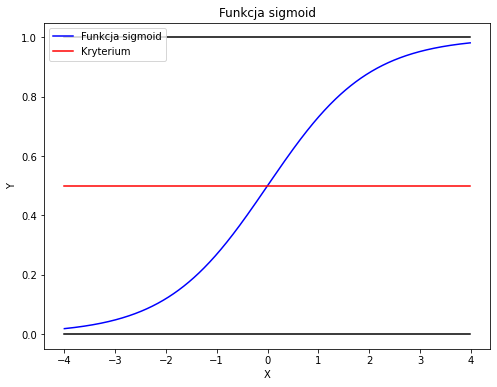

In [8]:
plt.figure(figsize = (8, 6))
plt.title('Funkcja sigmoid')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, np.repeat(0, len(x)), c = 'black')
plt.plot(x, np.repeat(1, len(x)), c = 'black')
plt.plot(x, y, c = 'blue', label = 'Funkcja sigmoid')
plt.plot(x, np.repeat(0.5, len(x)), c = 'red', label = 'Kryterium')
plt.legend()
plt.show()

Pobieranie danych

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

raw_data = load_breast_cancer()
raw_data

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [10]:
data = raw_data['data']
target = raw_data['target']

In [12]:
data[:10]

array([[17.99, 10.38, 122.80, 1001.00, 0.12, 0.28, 0.30, 0.15, 0.24, 0.08, 1.09, 0.91, 8.59, 153.40, 0.01, 0.05, 0.05, 0.02, 0.03, 0.01, 25.38, 17.33, 184.60, 2019.00, 0.16, 0.67, 0.71, 0.27, 0.46, 0.12],
       [20.57, 17.77, 132.90, 1326.00, 0.08, 0.08, 0.09, 0.07, 0.18, 0.06, 0.54, 0.73, 3.40, 74.08, 0.01, 0.01, 0.02, 0.01, 0.01, 0.00, 24.99, 23.41, 158.80, 1956.00, 0.12, 0.19, 0.24, 0.19, 0.28, 0.09],
       [19.69, 21.25, 130.00, 1203.00, 0.11, 0.16, 0.20, 0.13, 0.21, 0.06, 0.75, 0.79, 4.58, 94.03, 0.01, 0.04, 0.04, 0.02, 0.02, 0.00, 23.57, 25.53, 152.50, 1709.00, 0.14, 0.42, 0.45, 0.24, 0.36, 0.09],
       [11.42, 20.38, 77.58, 386.10, 0.14, 0.28, 0.24, 0.11, 0.26, 0.10, 0.50, 1.16, 3.44, 27.23, 0.01, 0.07, 0.06, 0.02, 0.06, 0.01, 14.91, 26.50, 98.87, 567.70, 0.21, 0.87, 0.69, 0.26, 0.66, 0.17],
       [20.29, 14.34, 135.10, 1297.00, 0.10, 0.13, 0.20, 0.10, 0.18, 0.06, 0.76, 0.78, 5.44, 94.44, 0.01, 0.02, 0.06, 0.02, 0.02, 0.01, 22.54, 16.67, 152.20, 1575.00, 0.14, 0.20, 0.40, 0.

In [13]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
print(f'data shape: {data.shape}')
print(f'target shape: {target.shape}')

data shape: (569, 30)
target shape: (569,)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, target)
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (426, 30)
x_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


Przygotowanie danych 

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_test

array([[-0.47, -0.14, -0.44, -0.49, 0.29, 0.06, -0.09, -0.25, 0.47, 0.16, ..., -0.26, -0.14, -0.33, -0.35, 0.49, -0.07, -0.00, -0.17, 0.22, 0.24],
       [1.36, 0.50, 1.31, 1.33, -0.39, 0.01, 0.26, 0.84, -0.81, -1.11, ..., 1.81, 0.18, 1.79, 1.76, -0.51, -0.09, 0.01, 1.03, -0.53, -0.99],
       [0.38, 0.07, 0.40, 0.26, 0.98, 0.39, 0.75, 0.88, 0.49, -0.64, ..., 0.64, 0.08, 0.55, 0.50, 1.01, -0.06, 0.56, 0.60, -0.07, -0.18],
       [-0.49, -0.36, -0.43, -0.53, 0.71, 0.57, -0.13, -0.52, 0.04, 1.17, ..., -0.70, -0.43, -0.52, -0.63, 0.59, 0.10, -0.14, -0.61, -0.52, 0.58],
       [-0.73, -1.13, -0.71, -0.71, 0.31, 0.18, -0.26, -0.58, 0.07, 0.72, ..., -0.83, -0.97, -0.85, -0.74, 0.14, -0.24, -0.44, -0.68, -0.89, -0.11],
       [1.83, 2.40, 1.99, 1.71, 1.59, 3.39, 3.36, 2.76, 2.23, 1.05, ..., 2.00, 2.31, 2.35, 1.68, 1.46, 4.16, 3.38, 2.37, 1.97, 2.32],
       [2.23, 0.64, 2.28, 2.32, 0.77, 1.81, 2.00, 2.71, 0.09, -0.17, ..., 2.40, 0.05, 2.67, 2.40, -0.08, 0.94, 1.05, 2.03, -0.22, 0.14],
       

In [19]:
scaler.mean_


array([14.12, 19.20, 91.89, 654.92, 0.10, 0.10, 0.09, 0.05, 0.18, 0.06, 0.40, 1.21, 2.86, 40.13, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.21, 25.51, 106.89, 873.72, 0.13, 0.25, 0.27, 0.11, 0.29, 0.08])

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = log_reg.predict(x_test)
y_proba = log_reg.predict_proba(x_test)

print(f'y_pred: {y_pred}')
print(f'y_proba: {y_proba[:5]}')

y_pred: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
y_proba: [[0.12 0.88]
 [1.00 0.00]
 [1.00 0.00]
 [0.00 1.00]
 [0.00 1.00]]


Accuracy score: 0.9790


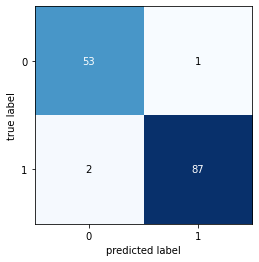

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)
print(f'Accuracy score: {accuracy_score(y_test, y_pred):.4f}')

In [48]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])
  fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
  fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        54
           1       0.99      0.98      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

